In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


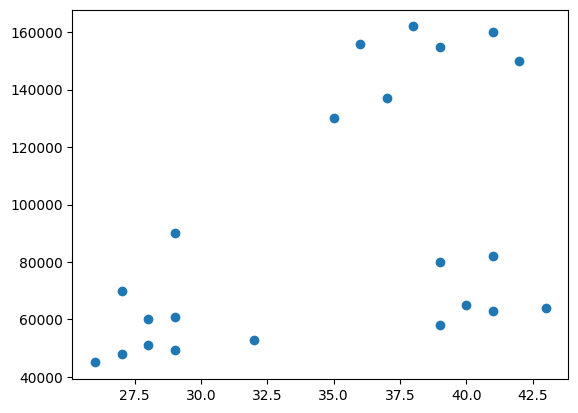

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [5]:
# K means clustering (purpose for adding one extra columns "Cluster' which is based on lebels
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[["Age", "Income($)"]])
km.labels_

F:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


<Axes: xlabel='Age', ylabel='Income($)'>

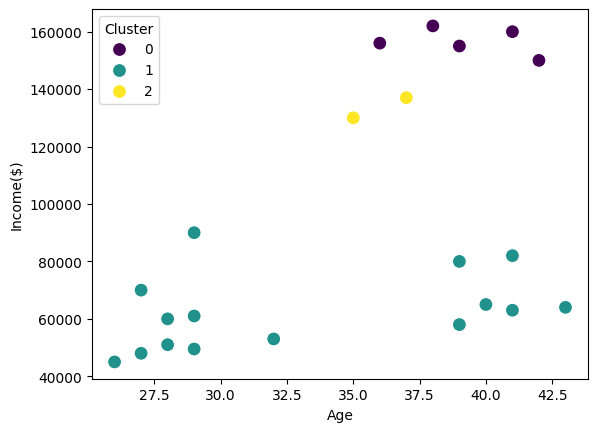

In [9]:
import seaborn as sns

sns.scatterplot(df, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

In [11]:
#Cluster are not formed properly. It can be due to age and income columns being in a different scale. We can try scaling them
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [25]:
# doin kmeans clustering on scalled data
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[["Age", "Income($)"]])
df_scaled['Cluster'] = km.labels_
df_scaled.head()

F:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [27]:
km.inertia_

0.4750783498553096

In [29]:
centroids = km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

<Axes: xlabel='Age', ylabel='Income($)'>

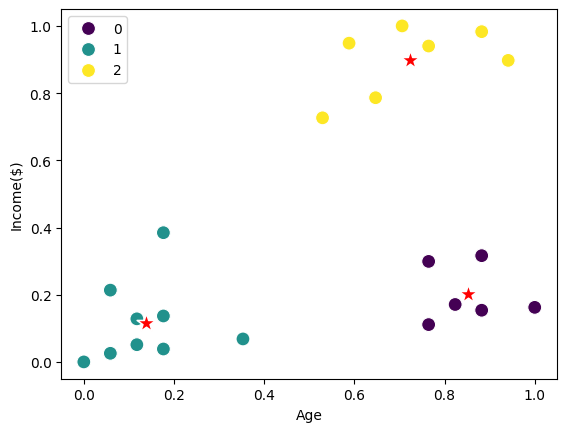

In [31]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],  s=200, color="red", marker='*')

In [33]:
# Elbow method to determine optimal number of parameter
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

F:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.39237665288019463,
 0.33956681023883983,
 0.25049720420583715,
 0.21884420054391673,
 0.1422298983018973,
 0.11123550695239098]

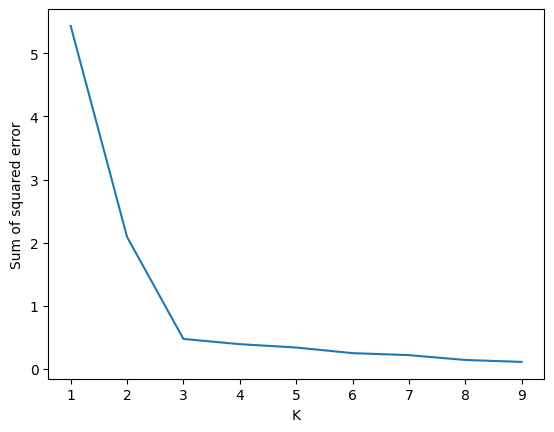

In [35]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

In [ ]:
# Chart shows optimal number of cluster is 3